## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, understand the results of an A/B test run by an e-commerce website.  Your goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

294478 rows are in the dataset.

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

There are 290584 unique users.

d. The proportion of users converted.

In [5]:
df['converted'].value_counts()[1]/ len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# To calculate this, we consider the other cases where old_page and treatment match and also new_page and control match
no_match_1 = df[(df['landing_page'] == 'old_page') & (df['group'] == 'treatment')]
no_match_2 = df[(df['landing_page'] == 'new_page') & (df['group'] == 'control')]
no_match_1.count()[0] + no_match_2.count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


From the info, we can see all columns don't have missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') == True) == ((df['landing_page'] == 'new_page') == True)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

From the info we had 290585 id's , but we got 290584 id's, so there is a duplicated id.

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# To find all entries with the same id we got
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset='user_id', keep="first", inplace=True)
# check
# df2[df2['user_id'] == 773192]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# probability of an individual converting regardless of the page
p_conv = df2['converted'].mean()
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# probability of an individual converted given they are in the control group
p_control_conv = df2[df2['group'] == 'control']['converted'].mean()
p_control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# probability of an individual converted given they are in the treatment group
p_treat_conv = df2[df2['group'] == 'treatment']['converted'].mean()
p_treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# probability that an individual received the new page
(df2.query('landing_page == "new_page"')).shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No, there is no sufficient evidence that the new treatment page will lead to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: Pnew - Pold \le 0$$
$$H_1: Pnew - Pold > 0$$

$$\alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# we assume that p_new = p_old = converted rate regardless of the page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# As per our assumption
p_old = p_new 
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# Number of individuals in the treatment group
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# Number of individuals in the control group
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# simulate n_new transactions with a rate of p_new
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# simulate same for n_old transactions with p_old rate
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# rate difference
new_page_converted.mean() - old_page_converted.mean()


-0.0011238346834950702

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# Simulate 10000 p_new - p_old (rate difference)
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

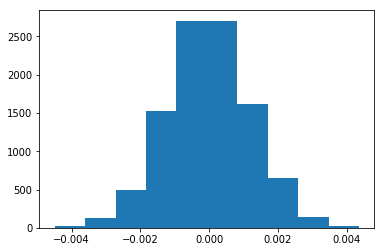

In [26]:
# change p_diffs to a numpy array
p_diffs = np.array(p_diffs)

# plot a histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

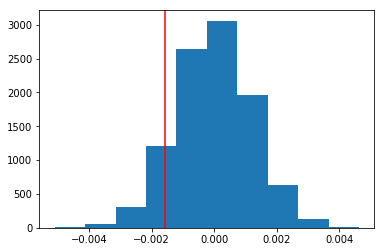

In [27]:
# Actual observed difference
obs_diff = p_treat_conv - p_control_conv

# To get the values greater than the actual observed difference
# Simulate a normal distribution
null_vals = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(null_vals);
# Plot a vertical line indicating the observed difference (obs_diff)
plt.axvline(obs_diff, color='r');

In [28]:
# P_value in this case is the mean of all the points greater than the obs_diff
p_value = (null_vals > obs_diff).mean()
p_value

0.90259999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Our alpha (Type I error threshold) is 0.05, The last calculation shows the P value , which is so big, bigger than alpha, this doesn't give us a significant evidence to reject the null**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer to the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control']['converted'].sum()
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
n_old = df2[df2['landing_page'] == 'old_page'].count()[0]
n_new = df2[df2['landing_page'] == 'new_page'].count()[0]
print('Number of conversions for group control: {}'.format(convert_old))
print('Number of conversions for group treatment: {}'.format(convert_new))
print('Number of individuals who received old page: {}'.format(n_old))
print('Number of individuals who received new page: {}'.format(n_new))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Number of conversions for group control: 17489
Number of conversions for group treatment: 17264
Number of individuals who received old page: 145274
Number of individuals who received new page: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
# according to documentation, convert_new and convert_old , n_new and n_old are the number of trials and successes
# alternative='larger' because our alternative hypothesis is picked like that 
z_score , p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score , p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p_value calculated from both ways give the same result which is larger than alpha(0.05), so we still don't have a significant evidence to reject the null.**

**z_score states how far the p_value is from the normal distribution mean.**


**The conclusion is the same as we obtained from steps j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression as it's used for classification processes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2[['-','ab_page']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,-,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-30 21:41 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**0.1899 is the new p_value I got from the logistic regression, which is different from what I got in the A/B hypothesis test (0.905), 
that's because in the hypothesis test, we assumed**

$H_0: Pnew - Pold \le 0$ and $H_1: Pnew - Pold > 0$

**while in the regression model we assume** 

$H_0: Pnew = Pold$ and $H_1: Pnew \neq Pold$

**getting the last p_value which is greater than alpha, we reject the null hypothesis, that the two pages layouts have the same effectiveness.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**To get more close to accurate decision, we need to add more features to our dataset, as gender, country, the page specifications, etc. But we might get more complex features interpretion on even fall in one of the 5 major MLR potential problems, like outliers, multicolinearity, non-linear relationships, correlated errors or non-constant variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# Load countries data
countries = pd.read_csv('countries.csv')
# Find countries column unique values
countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [35]:
# Create dummies for country column
countries_dummies = pd.get_dummies(countries['country'])
# Join with df2 , with appropriate used_id
df_new = df2.join(countries_dummies, how='inner')

In [36]:
df_new.head(20)

,user_id,timestamp,group,landing_page,converted,-,ab_page,intercept,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,0,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,0,0,1


In [37]:
# Build a logistic regression model to fit countries
logit = sm.Logit(df_new['converted'], df_new[['intercept','CA','UK']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366157
         Iterations 6


In [38]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-30 21:42 AIC:              209991.4116
No. Observations:   286742           BIC:              210023.1106
Df Model:           2                Log-Likelihood:   -1.0499e+05
Df Residuals:       286739           LL-Null:          -1.0499e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9964    0.0069  -290.3619  0.0000  -2.0098  -1.9829
CA           -0.0261    0.0269    -0.9682  0.3330  -0.0788   0.0267
UK            0.0063    0.0134     0.4695  0.6387  -0.0200   0.0325
==================================================================

"""

**The p-values for both CA and UK as I used US as a baseline, are all greater than 0.05, so they are not statistically significant.**

In [39]:
# This to identify the comparison between the dummies I selected with the baseline which is US
np.exp(result.params)

intercept    0.135830
CA           0.974284
UK           1.006309
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
#Create interaction variable for ab_page and UK / CA
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
df_new.head()

,user_id,timestamp,group,landing_page,converted,-,ab_page,intercept,CA,UK,US,ab_UK,ab_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,0,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,0,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,1,0,0,0


In [43]:
# Build a logistic regression model to fit countries dummies with the ab_page
logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_UK','ab_CA']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366160
         Iterations 6


In [44]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-30 21:47 AIC:              209992.7055
No. Observations:   286742           BIC:              210024.4046
Df Model:           2                Log-Likelihood:   -1.0499e+05
Df Residuals:       286739           LL-Null:          -1.0499e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9962    0.0062  -319.9881  0.0000  -2.0085  -1.9840
ab_UK         0.0006    0.0175     0.0355  0.9716  -0.0337   0.0349
ab_CA         0.0039    0.0368     0.1049  0.9164  -0.0683   0.0761
==================================================================

"""

In [45]:
# This to identify the comparison between the dummies I selected with the baseline which is US
np.exp(result.params)

intercept    0.135845
ab_UK        1.000622
ab_CA        1.003873
dtype: float64

**I have used US as a baseline for countries effect, so I checked the interaction between the ab_page variable with UK and CA**

**All p-values are greater than 0.05, which imply they are not statistically significant for our decision. whether I used ab_page only, or countries dummies only, or used both to find significance, it turned to be all are statistically insignificant**

<a id='conclusions'></a>
## Conclusion

>This test is made to decide on a new layout of a page, and see if it drags new conversion rates.

>In the Hypothesis part, we assumed that the old layout will drag more or equal conversion rates and the new layout will drag less conversion rates, and we got p_value of 0.905 that is greater than 0.05, which gave no evidence to reject the null hypothesis.

>In the regression model part, we assumed the old layout to drag same conversion rate as the new layout, and the alternative that the old page will not drag conversion rates as the new layout, with a p_value of 0.1899 which is greater than our alpha(0.05), we again failed to reject the null hypothesis.

>To get a better feature to decide if other factors would affect the conversion rate, we added country associated with users, to see if they are statistically significant, with the logistic regression model, we got all p_values greater than our Type I error threshold, so again we failed to reject the old layout.

>We can (till we get more data or features, maybe time spans or users genders) conclude that the new layout won't drag significant conversion rates as we would practically expect.

## Limitations

>Practically we can't decide on a new layout with only conversion and countries, we need more data as gender, page specification, time span, experiment duration etc.



In [1]:
# convert to html
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0